In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [2]:
from EXPLib.xai_library.model_explainers.lime import lime_utils
import torch
weight_path = './EXPLib/dl_component/CNN/Object_Detectors/toy_model_v1/aikonet_toymodelv1_ssdlite.pth'
img_path = './EXPLib/datasets/Camera/toy_model_v1_inference/dev/images/rgb_0000079.png'
model_name = 'ssdlite320_mobilenet_v3_large'
num_classes = 2
im_size = 320

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

segments_slic--- 0.1777503490447998 seconds ---
segments_watershed--- 0.08980631828308105 seconds ---
Watershed number of segments: 49


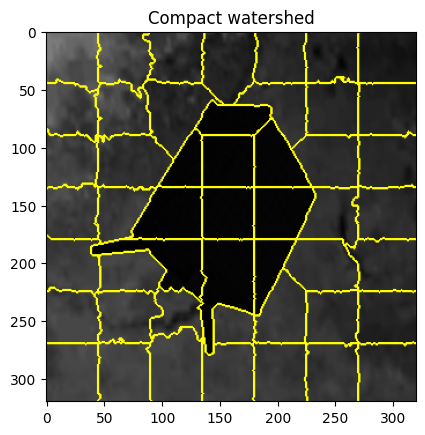

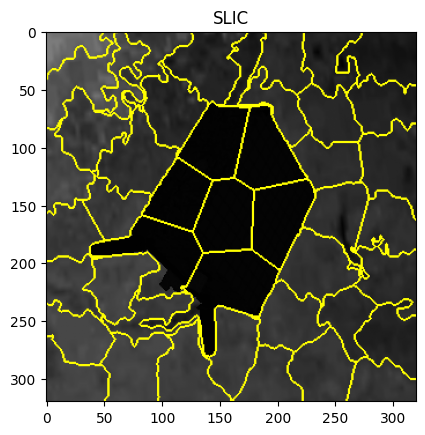

In [3]:
lime_utils.test_slic(img_path)

In [5]:
toymodel = lime_utils.load_model(model_name="ssdlite320_mobilenet_v3_large", weight_path = weight_path, device = device)
_,test_image = lime_utils.load_image(img_path)
detection_model = lime_utils._make_detection_callable(toymodel, device)

In [ ]:
lime_map, image_np = lime_utils.compute_lime(detection_model, img_path, num_segments=50)

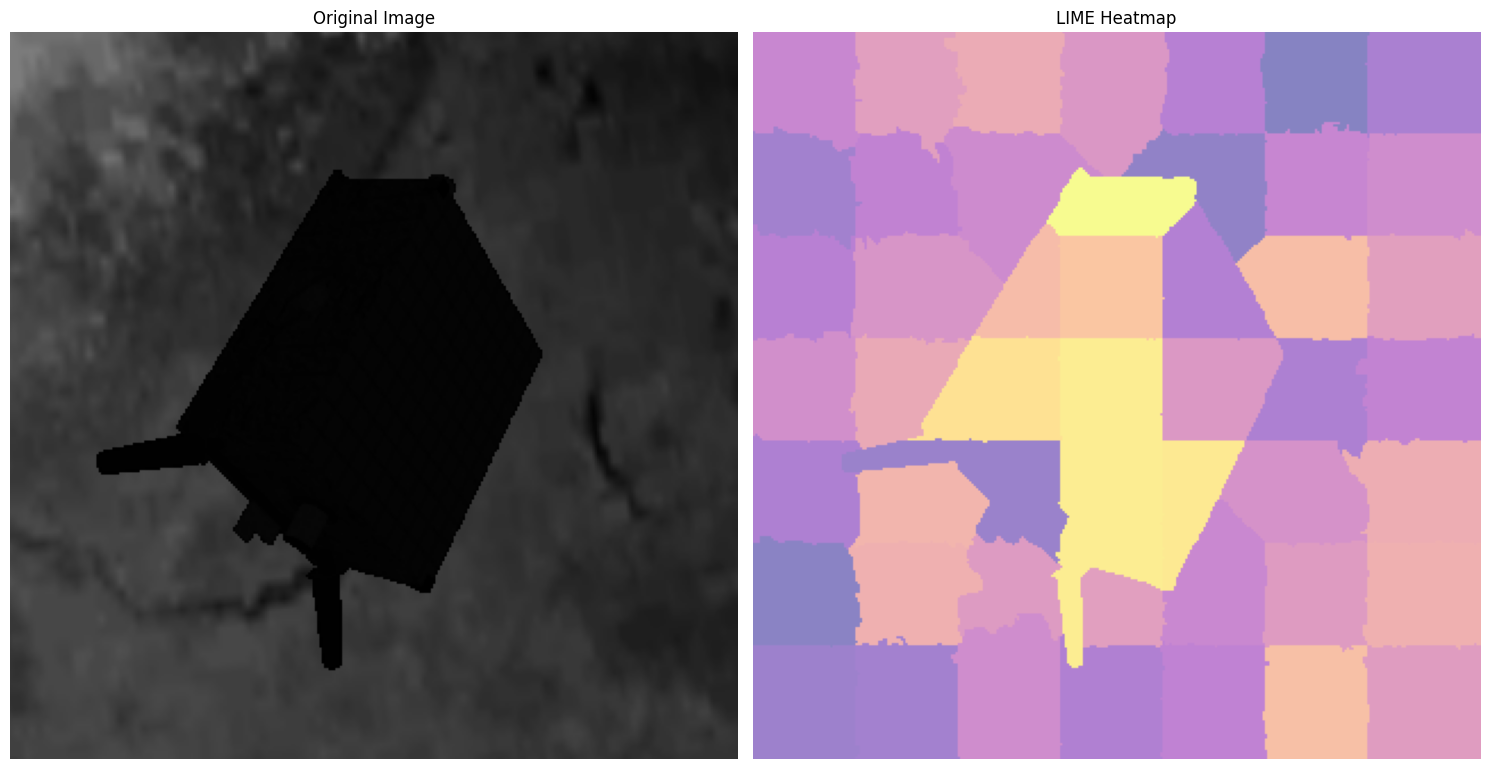

In [7]:
lime_utils.plot_lime(image_np, lime_map)
